<a href="https://colab.research.google.com/github/Mollylst/resnet18/blob/main/regression_logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!unzip -uq '/content/drive/MyDrive/data 8:1:1/train_fake.zip' -d /content/train
!unzip -uq '/content/drive/MyDrive/data 8:1:1/train_real.zip' -d /content/train
!unzip -uq '/content/drive/MyDrive/data 8:1:1/test_fake.zip' -d /content/test
!unzip -uq '/content/drive/MyDrive/data 8:1:1/test_real.zip' -d /content/test

In [ ]:
!rm -rf my_che /content/celeba_low_1000.pkl

In [40]:
import numpy as np
from PIL import Image
from scipy import fftpack

def image_label(imageLabel, label2idx, i):
    """return label of image
    """
    if imageLabel not in label2idx:
        label2idx[imageLabel]=i
        i = i + 1
    return label2idx, i
    
def dct2(array):
    array = fftpack.dct(array, type=2, norm="ortho", axis=0)
    array = fftpack.dct(array, type=2, norm="ortho", axis=1)
    return array

def log_scale(array, epsilon=1e-12):
    """Log scale the input array.
    """
    array = np.abs(array)
    array += epsilon  # no zero in log
    array = np.log(array)
    return array

In [41]:
import cv2
import os
import numpy as np
import random
import torch
import torchvision
import os
from torchvision import datasets 
from torch.utils.data import random_split
import torchvision.transforms as transforms

def image2npy(dir_path='/content/train'):
    i = 0
    label2idx = {}
    data = []
    for (root, dirs, files) in os.walk(dir_path):
        for file in files: 
            img_path = os.path.join(root, file) 
            File = root.split('/')[-1] #name of the file which is label
            img_data = cv2.imread(img_path,0)
            image = np.asarray(img_data)
            image = dct2(image)
            img_data = log_scale(image)

            label2idx, i = image_label(File, label2idx, i)
            label = label2idx[File]
            
            data.append([np.array(img_data), label])

    train_data,valid_data=random_split(data,[16000,2000])

    X_train = np.array([i[0] for i in train_data]) # train feature
    y_train = np.array([i[1] for i in train_data]) # train label
    X_valid = np.array([i[0] for i in valid_data]) 
    y_valid = np.array([i[1] for i in valid_data]) 
    print(len(X_train), len(y_train), len(X_valid), len(y_valid))

    np.save('drive/MyDrive/train-images.npy', X_train)
    np.save('drive/MyDrive/train-labels.npy', y_train)
    np.save('drive/MyDrive/valid-images.npy', X_valid)
    np.save('drive/MyDrive/valid-labels.npy', y_valid)
    return label2idx

image2npy()

16000 16000 2000 2000


{'fake': 1, 'real': 0}

In [42]:
import cv2
import os
import numpy as np
import random

def image2npy1(dir_path='/content/test'):
    
    i = 0
    label2idx = {}
    data = []
    for (root, dirs, files) in os.walk(dir_path):
        for file in files: 
            img_path = os.path.join(root, file) 
            File = root.split('/')[-1] #name of the file which is label
            img_data = cv2.imread(img_path,0)
            image = np.asarray(img_data)
            image = dct2(image)
            img_data = log_scale(image)

            label2idx, i = image_label(File, label2idx, i)
            label = label2idx[File]
            data.append([np.array(img_data), label])

    X_test = np.array([i[0] for i in data]) # test feature
    y_test = np.array([i[1] for i in data]) # test label 
    print(len(X_test), len(y_test))

    np.save('drive/MyDrive/test-images.npy', X_test)
    np.save('drive/MyDrive/test-labels.npy', y_test)
    return label2idx

image2npy1()

2000 2000


{'fake': 1, 'real': 0}

(2000, 128, 128) (2000,)


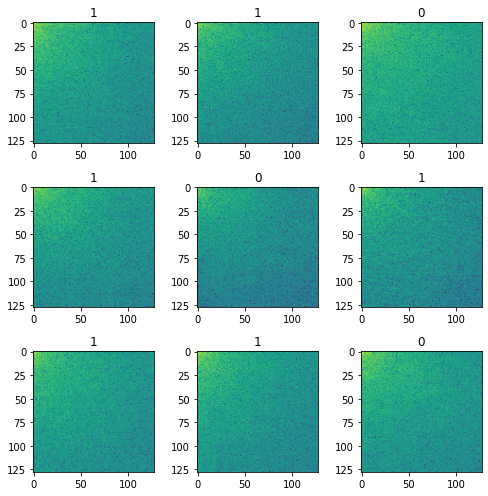

In [43]:
import matplotlib.pyplot as plt

image_no = np.random.randint(0,2000, size=9) 
valid_images = np.load('./drive/MyDrive/valid-images.npy',allow_pickle=True)
valid_labels = np.load('./drive/MyDrive/valid-labels.npy',allow_pickle=True)
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(7,7))
for i in range(3):
    for j in range(3):
        axes[i][j].imshow(valid_images[image_no[i*3+j]])
        axes[i][j].set_title(valid_labels[image_no[i*3+j]])
plt.tight_layout()
print(valid_images.shape,valid_labels.shape)

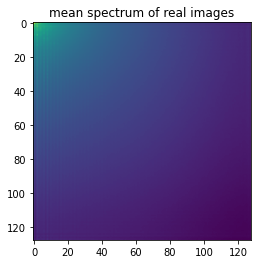

In [44]:
import cv2
import os
import numpy as np
import random
import matplotlib.pyplot as plt

def realmean():
    dir_path='/content/train/real'
    i = 0
    data = []
    spectrum_sum=[]
    spectrum_mean=[]
    for (root, dirs, files) in os.walk(dir_path):
        for file in files: 
          img_path = os.path.join(root, file) 
          img_data = cv2.imread(img_path,0)
          image = np.asarray(img_data)
          image = dct2(image)
          img_data = log_scale(image)
          data.append([np.array(img_data)])
            
    num = len(data)
    spectrum = np.array([i[0] for i in data]) 
    spectrum_sum = sum(np.array([i[0] for i in data]))
    spectrum_mean = spectrum_sum/num
    plt.imshow(spectrum_mean)
    plt.title('mean spectrum of real images')
    plt.show
    return 

realmean()

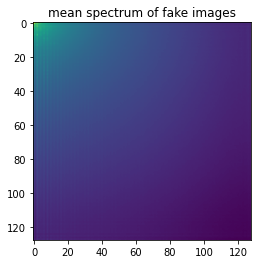

In [17]:
import cv2
import os
import numpy as np
import random
import matplotlib.pyplot as plt

def fakemean():
    dir_path1='/content/train/fake'
    j = 0
    data1 = []
    spectrum_sum1=[]
    spectrum_mean1=[]
    for (root, dirs, files) in os.walk(dir_path1):
        for file in files: 
          img_path = os.path.join(root, file) 
          img_data = cv2.imread(img_path,0)
          image = np.asarray(img_data)
          image = dct2(image)
          img_data = log_scale(image)
          data1.append([np.array(img_data)])
            
    num1 = len(data1)
    spectrum = np.array([j[0] for j in data1]) 
    spectrum_sum1 = sum(np.array([j[0] for j in data1]))
    spectrum_mean1 = spectrum_sum1/num1
    plt.imshow(spectrum_mean1)
    plt.title('mean spectrum of fake images')
    plt.show
    return

fakemean()

In [45]:
import torch
import torchvision
import os
import numpy as np
from torchvision import datasets 
import torchvision.transforms as transforms
from torch.utils.data import random_split

train_images = np.load('./drive/MyDrive/train-images.npy')
train_labels = np.load('./drive/MyDrive/train-labels.npy')
valid_images = np.load('./drive/MyDrive/valid-images.npy')
valid_labels = np.load('./drive/MyDrive/valid-labels.npy')
test_images = np.load('./drive/MyDrive/test-images.npy')
test_labels = np.load('./drive/MyDrive/test-labels.npy')

X_train = torch.from_numpy(train_images).float() 
X_valid = torch.from_numpy(valid_images).float()
X_test = torch.from_numpy(test_images).float()
Y_train = torch.from_numpy(train_labels).long() 
Y_valid = torch.from_numpy(valid_labels).long()
Y_test = torch.from_numpy(test_labels).long()

print(X_train.shape, Y_train.shape)
print(X_valid.shape, Y_valid.shape)
print(X_test.shape, Y_test.shape)

MINIBATCH_SIZE = 128

trainDataset = torch.utils.data.TensorDataset(X_train, Y_train) 
trainloader = torch.utils.data.DataLoader(
    dataset=trainDataset,
    batch_size=MINIBATCH_SIZE,
    shuffle=True,
    num_workers=2          # set multi-work num read data
)

validDataset = torch.utils.data.TensorDataset(X_valid, Y_valid) 
validloader = torch.utils.data.DataLoader(
    dataset=validDataset,
    batch_size=MINIBATCH_SIZE,
    shuffle=True,
    num_workers=2          # set multi-work num read data
)

testDataset = torch.utils.data.TensorDataset(X_test, Y_test) 
testloader = torch.utils.data.DataLoader(
    dataset=testDataset,
    batch_size=MINIBATCH_SIZE, 
    shuffle=True, 
    num_workers=2 
)

torch.Size([16000, 128, 128]) torch.Size([16000])
torch.Size([2000, 128, 128]) torch.Size([2000])
torch.Size([2000, 128, 128]) torch.Size([2000])


In [46]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu


In [47]:
import torch.nn as nn
input_size=128*128
num_classes=2

class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes, mean, std):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
        self.mean = torch.tensor(mean)
        self.std = torch.tensor(std)

    def forward(self, x):
        x = x - self.mean
        x = x / self.std
        out = self.linear(x)
        return out

model = LogisticRegression(input_size, num_classes, [1.4316], [1.4778]).to(device)

In [48]:
import torch.optim as optim
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim.lr_scheduler import CosineAnnealingLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001,momentum=0.9, weight_decay=5e-4) 
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=100, eta_min=0, last_epoch=-1, verbose=False)

Epoch: 1/50
Epoch: 001, Training: Loss: 0.7472, Accuracy: 49.9062%, 
		Validation: Loss: 0.7560, Accuracy: 49.1000%, Time: 2.9460s
Best Accuracy for validation : 0.4910 at epoch 001
Epoch: 2/50
Epoch: 002, Training: Loss: 0.7004, Accuracy: 55.2250%, 
		Validation: Loss: 0.7417, Accuracy: 50.6500%, Time: 2.8187s
Best Accuracy for validation : 0.5065 at epoch 002
Epoch: 3/50
Epoch: 003, Training: Loss: 0.6662, Accuracy: 59.2250%, 
		Validation: Loss: 0.7416, Accuracy: 51.2500%, Time: 2.8344s
Best Accuracy for validation : 0.5125 at epoch 003
Epoch: 4/50
Epoch: 004, Training: Loss: 0.6318, Accuracy: 63.9750%, 
		Validation: Loss: 0.7345, Accuracy: 50.9500%, Time: 2.8511s
Best Accuracy for validation : 0.5125 at epoch 003
Epoch: 5/50
Epoch: 005, Training: Loss: 0.6064, Accuracy: 67.6250%, 
		Validation: Loss: 0.7265, Accuracy: 50.7000%, Time: 2.8915s
Best Accuracy for validation : 0.5125 at epoch 003
Epoch: 6/50
Epoch: 006, Training: Loss: 0.5824, Accuracy: 70.5625%, 
		Validation: Loss: 0

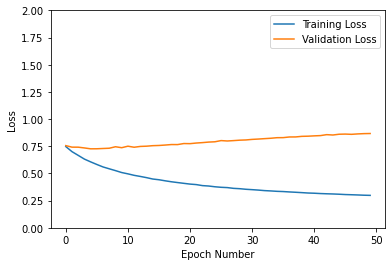

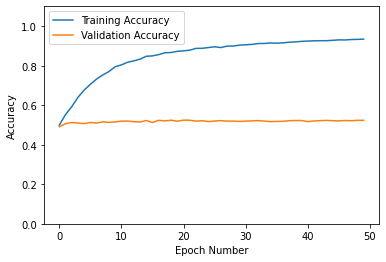

In [49]:
import time
import matplotlib.pyplot as plt
from torch.autograd import Variable

num_epoch=50
path='./deepfake-LR.pth'

def train_and_valid():
    history = []
    best_acc = 0.0
    best_epoch = 0
    input_size = 128*128
    num_classes = 2
    lambda1, lambda2 = 0.5, 0.01
    
    for epoch in range(0,num_epoch):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, num_epoch))

        model.train()
        train_loss = 0.0
        train_acc = 0.0
        valid_loss = 0.0
        valid_acc = 0.0

        #train
        for i, (inputs, labels) in enumerate(trainloader):

            inputs = Variable(inputs.view(-1, 128 * 128))  # Images flattened into 1D tensors
            labels = Variable(labels)  # Labels
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs,labels)

            #all_linear1_params = torch.cat([x.view(-1) for x in model.linear.parameters()])
            #l1_regularization = lambda1 * torch.norm(all_linear1_params, 1)
            #loss = loss + l1_regularization

            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)
            _,predictions = torch.max(outputs.data, 1)
            train_acc += (predictions == labels).sum().item()

        #test
        model.eval()
        with torch.no_grad():

            for j, (inputs, labels) in enumerate(testloader):

                inputs = Variable(inputs.view(-1, 128 * 128))  # Images flattened into 1D tensors
                labels = Variable(labels)  # Labels
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                valid_loss += loss.item() * inputs.size(0)
                _,predictions = torch.max(outputs.data, 1)
                valid_acc += (predictions == labels).sum().item()
 
        avg_train_loss = train_loss/ len(trainDataset)
        avg_train_acc = train_acc/ len(trainDataset)
 
        avg_valid_loss = valid_loss/ len(testDataset)
        avg_valid_acc = valid_acc/ len(testDataset)

        #record the accuracy and loss in each epoch
        history.append([avg_train_loss, avg_valid_loss, avg_train_acc, avg_valid_acc])
 
        if best_acc < avg_valid_acc:
            best_acc = avg_valid_acc
            best_epoch = epoch + 1
            torch.save(model.state_dict(),path)
        scheduler.step()  

        epoch_end = time.time()
        
        print("Epoch: {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation: Loss: {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(
            epoch+1, avg_train_loss, avg_train_acc*100, avg_valid_loss, avg_valid_acc*100, epoch_end-epoch_start
        ))
        print("Best Accuracy for validation : {:.4f} at epoch {:03d}".format(best_acc, best_epoch))
          
    return history
    
#start training and testing
history = train_and_valid()

#make the plots
history = np.array(history)
plt.plot(history[:, 0:2])
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.ylim(0, 2)
#plt.savefig(dataset+'_loss_curve.png')
plt.show()
 
plt.plot(history[:, 2:4])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)
#plt.savefig(dataset+'_accuracy_curve.png')
plt.show()

In [72]:
model.load_state_dict(torch.load(path))
correct = 0
total = 0
model.eval()
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for j, (inputs, labels) in enumerate(testloader):
        inputs = Variable(inputs.view(-1, 128 * 128))  # Images flattened into 1D tensors
        labels = Variable(labels)  # Labels
        outputs = model(inputs)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the test images: 53 %
